
## **Intent Classification with Orq.ai powered by Groq**

This quick guide demonstrates how to build and evaluate an AI application for intent classification using the Orq platform.

Before you begin, make sure you have an Orq account. If you don't have one, sign up first. Additionally, we’ve prepared a Google Colab file that you can copy and run immediately, simplifying the setup process. Just replace the API key, and you’re ready to go! After completing this tutorial, visit the Orq documentation for more advanced topics

**Why Intent Classification is Useful**  
Intent classification is a powerful tool for understanding and categorizing user inputs, making it essential for building smarter, more responsive applications. Here are a few use cases:

- Customer Support: Automatically categorize support tickets or chatbot queries to route them to the right team.
- E-commerce Personalization: Understand user intents like "buy," "browse," or "compare" to tailor shopping experiences.
- Task Automation: Trigger specific workflows based on user commands, such as scheduling meetings or setting reminders.

**Step 1: Install Dependencies**  
Start by installing the required packages. These include the Orq SDK and additional libraries for handling datasets and managing environment variables.

You have access to the newest models powered by Groq in Orq's Model Garden.

In [11]:
pip install orq-ai-sdk datasets huggingface_hub

**Step 2: Initialize the Orq Client**  

The Orq client allows you to communicate with the Orq platform. Set it up using your API key, which can be stored as an environment variable (ORQ_API_KEY) or passed directly.

In [2]:
import os

from orq_ai_sdk import Orq

client = Orq(
  api_key=os.environ.get("ORQ_API_KEY", "your_orq_token_here"),
)

### Hugging Face

Before proceeding, sign up for a free Hugging Face account if you don’t already have one. You’ll need an API key to access their datasets library. Retrieve your API key here after signing up or logging in.

**Step 3: Load a Dataset**  
Use the Hugging Face datasets library to load the dataset for intent classification. Here, we use a public dataset that contains user queries labeled with intents.

In [4]:
from huggingface_hub import login

# Use your Hugging Face API token
login(token="insert_HF_API_key_here")

In [7]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("Bhuvaneshwari/intent_classification")
df = dataset["train"].to_pandas()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


train.csv:   0%|          | 0.00/818k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13808 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13808 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/13808 [00:00<?, ? examples/s]

In [8]:
# Select the top 50 rows
df = df.head(50)

# Display the DataFrame or save it
print(df)

                                                 text                intent
0    listen to westbam alumb allergic on google music             PlayMusic
1          add step to me to the 50 clásicos playlist         AddToPlaylist
2   i give this current textbook a rating value of...              RateBook
3                play the song little robin redbreast             PlayMusic
4   please add iris dement to my playlist this is ...         AddToPlaylist
5   add slimm cutta calhoun to my this is prince p...         AddToPlaylist
6                 i want to listen to seventies music             PlayMusic
7                                        Good Morning             Greetings
8               play a popular chant by brian epstein             PlayMusic
9                                     find fish story  SearchScreeningEvent
10                            book a spot for 3 in mt        BookRestaurant
11  i need a forecast for jetmore  massachusetts i...            GetWeather
12          

In [9]:
# Extract unique labels from the "intent" column
unique_labels = df["intent"].unique()
unique_labels

array(['PlayMusic', 'AddToPlaylist', 'RateBook', 'Greetings',
       'SearchScreeningEvent', 'BookRestaurant', 'GetWeather',
       'Book Meeting', 'SearchCreativeWork'], dtype=object)

#### **Model Configuration**  

This deployment runs on Groq to achieve ultra-low latency, ensuring real-time responsiveness. Its high-speed processing is crucial for complex workflows, especially when integrating intent classification, where every millisecond counts in delivering seamless user interactions.  

#### **Model Configuration**  

This deployment runs on Groq to achieve ultra-low latency, ensuring real-time responsiveness. Its high-speed processing is crucial for complex workflows, especially when integrating intent classification, where every millisecond counts in delivering seamless user interactions.  

In cases where the primary model does not execute correctly, the system falls back to LLaMA 3.2 - 3B, ensuring reliability and continuity without significant disruption.  


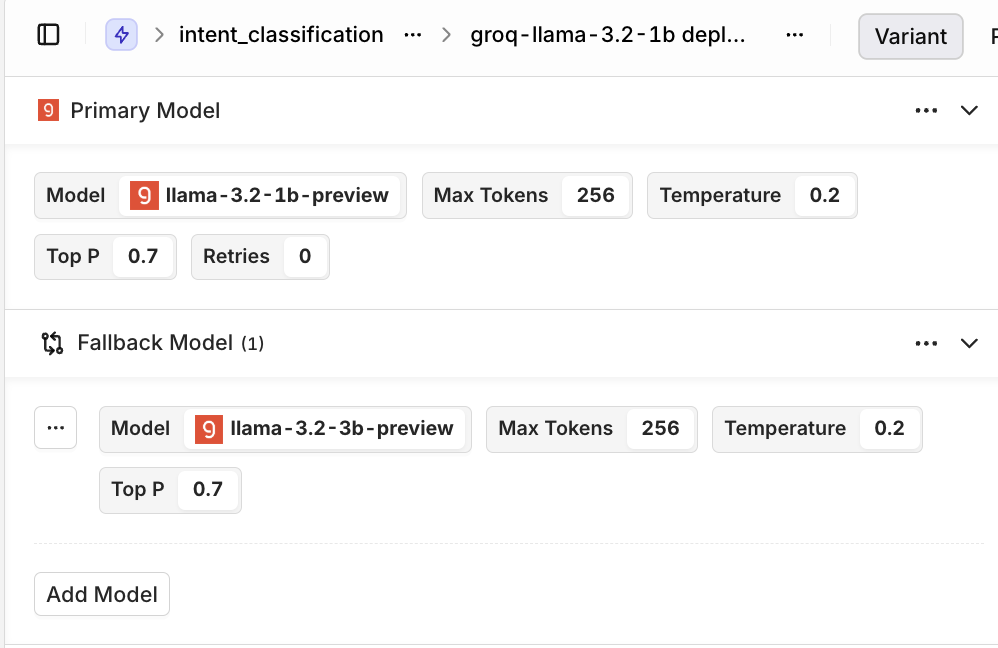

#### **Intent classification prompt**

This deployment is designed to classify user inputs into specific intents to understand the purpose behind their requests. The model will identify the most appropriate intent from a predefined set, enabling precise and context-aware responses.

Intent recognition is particularly useful when setting up chatbots

This is the prompt in Orq.ai:

```plaintext
You are a classifier that outputs ONLY a single word intent label with no quotes, punctuation, or additional text.

Valid intent labels are:
PlayMusic
AddToPlaylist  
RateBook
Greetings
SearchScreeningEvent
BookRestaurant
GetWeather
BookMeeting
SearchCreativeWork
Cancellation
Affirmation
excitment

Examples:
Input: "Hey there, how are you doing?"
Greetings

Input: "Play the album Abbey Road by The Beatles."
PlayMusic

Input: "Add this song to my workout playlist."
AddToPlaylist

Input: "This book deserves a solid five-star rating."
RateBook

Remember: Output ONLY the single intent label with no additional text or formatting.

here is the input that needs intent classification: {{text}}



**Step 4: Invoke Orq Deployment**  

Integrate the Orq intent classification model by invoking a deployed model for predictions. Iterate through the dataset and store the results in a new column called "output".

In [16]:
# Placeholder for the deployment key
deployment_key = "intent_classification"

# Create an empty list to store outputs
outputs = []

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    text_input = row["text"]  # Extract the text column

    # Invoke the model for each text input
    generation = client.deployments.invoke(
        key=deployment_key,
        context={
            "environments": []
        },
        inputs={
            "text": text_input
        },
        metadata={
            "custom-field-name": "custom-metadata-value"
        }
    )

    # Append the output to the list
    outputs.append(generation.choices[0].message.content)


In [17]:
 # Add the output column to the DataFrame
df["output"] = outputs

**Step 5: Evaluate Model Performance**  

Use metrics such as accuracy, precision, recall, and F1-score to assess the quality of your model's predictions.

In [18]:
df

,text,intent,output
0,listen to westbam alumb allergic on google music,PlayMusic,PlayMusic
1,add step to me to the 50 clásicos playlist,AddToPlaylist,AddToPlaylist
2,i give this current textbook a rating value of...,RateBook,RateBook
3,play the song little robin redbreast,PlayMusic,PlayMusic
4,please add iris dement to my playlist this is ...,AddToPlaylist,AddToPlaylist
5,add slimm cutta calhoun to my this is prince p...,AddToPlaylist,AddToPlaylist
6,i want to listen to seventies music,PlayMusic,PlayMusic
7,Good Morning,Greetings,Greetings
8,play a popular chant by brian epstein,PlayMusic,PlayMusic
9,find fish story,SearchScreeningEvent,SearchCreativeWork


In [19]:

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

true_labels = df["intent"]
predicted_labels = df["output"]

# Calculate performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print the metrics
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Performance Metrics:
Accuracy: 0.8800
Precision: 0.7550
Recall: 0.7542
F1 Score: 0.7536


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Next Steps**  

Congratulations! You've successfully built and evaluated an intent classification application using Orq. To further enhance your application:

- Explore other datasets and use cases.
- Integrate the model into a chatbot or voice assistant.
- Automate deployment and testing with Orq’s advanced features.

For more resources, visit the Orq documentation.